# Assignment

We saw a few examples of machine learning algorithms, so at this point it seems like once you get the data ready, machine learning is just "plug and play", but not so fast! 

In this assignment, we learn about **regularization**! Regularization is a means by which we can control how much a machine learning algorithm learns. The controlling is done using a parameter that the algorithm, called the **shrinkage parameter**, which is just an argument of the algorithm. The shrinkage parameter is an example of a **hyper-parameter**. A hyper-parameter is like a knob: by specifying a different value for the hyper-parameter, we control how the training happens, a process called **hyper-parameter tuning**. We talk about this is more detail in the next lesson.

We will look at two examples of regularizaiton: LASSO and Ridge regression. Both LASSO and Ridge regression are implementations of linear regression where we try to minimize prediction error plus some penalty that depends on the model's parameters (or coefficients) and the shrinkage constant (`alpha` in the code below). LASSO penalizes the model's parameters using the sum of the **absolute values** of the parameters (this is also called **L1-regularization**), while Ridge does so based on the sum of the **squared values** of the parameters (this is also called **L2-regularization**). For reasons we cannot elaborate on here, **LASSO has the by-product that it also does feature selection**, whereas Ridge doesn't. So not all regularization results in feature selection.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Root Mean Squared Error (RMSE)
Before we dive into regularization we need to have a metric that tells us if our regression is good or bad.  For regressions we measure success differently than with classifications.  Instead of accuracy, the primary measure is **Root Mean Squared Error** (**RMSE**).  A **RMSE** of zero occurs when the predictions are perfect. **RMSE** increases as the predictions get worse. Let's disect the term **Root Mean Squared Error** by understanding each word from right to left.

### Error
The **E** in **RMSE** stands for **E**rror ($e_i$).  The error ($e_i$) is the difference between the known test target value ($y_i$) of sample $i$ and the predicted target value ($\hat{y}_i$) based on the test inputs of sample $i$.
$$e_i = y_i - \hat{y}_i$$
where
- $e_i$ is the error of the $i$th sample
- $y_i$ is the test target value of the $i$th sample
- $\hat{y}_i$ is the predicted target value from the inputs of the $i$th sample

### Squared
The **S** in **RMSE** stands for squared.  The errors ($e_i$) are squared: $(e_i)^2$.  

### Mean
The **M** in **RMSE** stands for mean.  We get the mean squared error (**MSE**) by taking the mean of all the squared errors in the sample:
$$\text{MSE} = \frac{1}{n}\sum_{i}(e_i)^2$$
where
- $\text{MSE}$ is the mean squared error
- $n$ is the number of samples

### Root
The **R** in **RMSE** stands for root.  We get the root mean squared error (**RMSE**) by taking the square root mean of **MSE**
$$\text{RMSE} = \sqrt{\text{MSE}}$$

Both **MSE** and **RMSE** are used to measure the prediction error.  **RMSE** is often preferred because it is in the units of the target variable ($y$), whereas **MSE** is in units of the target variable squared ($y^2$).

0. Compute error metrics.  
<br/>
To make sure we understand RMSE, lets do one small exercise.

We have the following data:
- The actual test target values are: `20, 15, 12, 17, 15, 14, 19, 17`
- The predicted target values predicted from test inputs are: `19, 12, 12, 19, 17, 17, 17, 18`

Determine and show
1. the 8 errors
2. the 8 squared errors derived from the errors
3. the MSE derived from the 8 squared errors
4. the RMSE derived from the MSE
5. the RMSE derived from the actual test target values and the predicted target values using sklearn.metrics.mean_squared_error with squared=False
<br/><span style="color:red" float:right>[1 point]</span>

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Actual test target values
actual_values = np.array([20, 15, 12, 17, 15, 14, 19, 17])

# Predicted target values
predicted_values = np.array([19, 12, 12, 19, 17, 17, 17, 18])

# Step 1: Calculate the errors
errors = actual_values - predicted_values

# Step 2: Calculate the squared errors
squared_errors = errors ** 2

# Step 3: Calculate the MSE (Mean Squared Error)
mse = np.mean(squared_errors)

# Step 4: Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Step 5: Calculate the RMSE using sklearn.metrics.mean_squared_error with squared=False
rmse_sklearn = mean_squared_error(actual_values, predicted_values, squared=False)

# Print the results
print("Errors:", errors)
print("Squared Errors:", squared_errors)
print("MSE:", mse)
print("RMSE:", rmse)
print("RMSE (sklearn):", rmse_sklearn)



Errors: [ 1  3  0 -2 -2 -3  2 -1]
Squared Errors: [1 9 0 4 4 9 4 1]
MSE: 4.0
RMSE: 2.0
RMSE (sklearn): 2.0


## Regularization
Let's get back to the main portion of this assignment.  As always we will need data before we can do our work.  Here we will use the California Housing Data.  We will create regressions that predict the median house value in Californian communities.  You can find a description here:  https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [21]:
# Get California Housing Data
from sklearn.datasets import fetch_california_housing
HousingCal = fetch_california_housing()
# 20640 rows × 9 columns
# MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal,
df_housing = pd.DataFrame(data=HousingCal['data'], columns=HousingCal['feature_names'])
df_housing[HousingCal['target_names'][0]] = HousingCal['target']

Present the size of the data frame and the first few rows and a histogram for `MedHouseVal`. <br/><span style="color:red" float:right>[0 point]</span>

data frame size (20640, 9)


'first few rows of data frame'

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


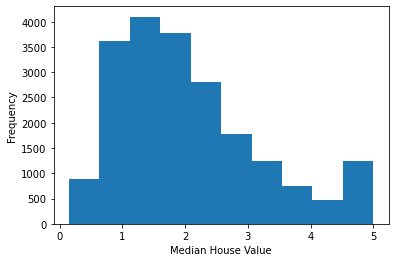

In [22]:
print("data frame size", df_housing.shape)
display("first few rows of data frame", df_housing.head())

# Plotting a histogram
plt.hist(df_housing['MedHouseVal'], bins=10) 

# Adding labels and title
plt.xlabel('Median House Value')
plt.ylabel('Frequency')


# Display the histogram
plt.show()


It is better to create a model that is limited in its scope, than to include data that are difficult to interpret.  In this case, the prices for houses greater or equal to 5, are mostly incorrect.  

1. Prepare the data

Prepare the data by doing the following:
1. remove the houses where `MedHouseVal` is greater or equal to 5 and present another histogram of `MedHouseVal`
2. remove `Latitude` and `Longitude` because we haven't learned yet how to make these useful
3. split the data into features and target
4. split the features and target into training and test sets
5. normalize the training and test features based on the training data
<br/><span style="color:red" float:right>[1 point]</span>

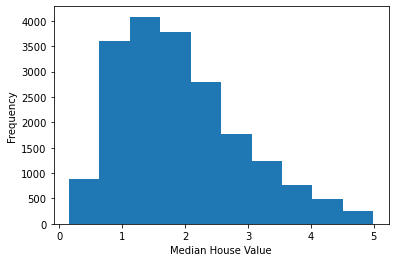

In [23]:
df_housing.MedHouseVal.describe()
# remove the houses where `MedHouseVal` is greater or equal to 5

df_filtered = df_housing[df_housing['MedHouseVal'] < 5].copy()
# Present histogram of MedHouseVal

plt.hist(df_filtered['MedHouseVal'], bins=10)  

# Adding labels and title
plt.xlabel('Median House Value')
plt.ylabel('Frequency')


# Display the histogram
plt.show()


In [24]:

# remove `Latitude` and `Longitude`
# Drop "Latitude" and "Longitude" columns from the filtered DataFrame
df_filtered.drop(['Latitude', 'Longitude'], axis=1, inplace=True)


In [25]:

# split the data into features and target

X = df_filtered.drop('MedHouseVal', axis=1)
y = df_filtered['MedHouseVal']

# split the features and target into training and test sets

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:

#  Normalize using robust normalization

# Calculate the offset and scale for each feature
offset = np.median(X, axis=0)
scale = np.percentile(X, 75, axis=0) - np.percentile(X, 25, axis=0)

# Perform robust normalization on the features
X_robust = (X - offset) / scale

# Create a new DataFrame with the Robust-normalized features
X_robust_df = pd.DataFrame(X_robust, columns=X.columns)

# Print the Robust-normalized DataFrame rounded to 2 decimal places
print(X_robust_df.round(decimals=2))


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0        2.37      0.68      1.16      -0.27       -0.90     -0.33
1        2.36     -0.37      0.68      -0.82        1.29     -0.85
2        1.85      1.26      2.00       0.27       -0.72     -0.04
3        1.07      1.26      0.41       0.26       -0.65     -0.34
4        0.19      1.26      0.71       0.35       -0.65     -0.76
...       ...       ...       ...        ...         ...       ...
20635   -0.92     -0.16     -0.09       0.91       -0.35     -0.32
20636   -0.43     -0.53      0.60       2.86       -0.87      0.33
20637   -0.85     -0.58      0.01       0.77       -0.18     -0.60
20638   -0.77     -0.53      0.09       1.32       -0.46     -0.83
20639   -0.52     -0.63      0.04       1.22        0.22     -0.26

[19648 rows x 6 columns]


2. Train and Predict
- Train a linear regression algorithm, using `LinearRegression` from `sklearn.linear_model`, to predict `MedHouseVal` on the prepared data.
- predict benchmark values for both training and test data sets.
<br/><span style="color:red" float:right>[1 point]</span>

In [27]:
# Add code here
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train_benchmark = linreg.predict(X_train)
y_hat_test_benchmark = linreg.predict(X_test)

3. Evaluate the model
<br/>Calculate and report the performance (RMSE) on both training and test data. These numbers will serve as our benchmark performance. As a sanity check, create a scatter plot of the bench mark predictions against the actual values for the each of the two (train, test) data sets.
<br/><span style="color:red" float:right>[2 point]</span>

In [28]:

# Calculate RMSE on the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train_benchmark))
print("RMSE on training data:", rmse_train)

# Calculate RMSE on the test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test_benchmark))
print("RMSE on test data:", rmse_test)


RMSE on training data: 0.6845345464489843
RMSE on test data: 0.6958150975822394


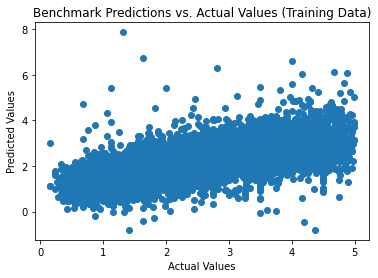

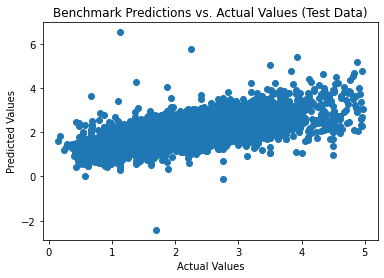

In [29]:


# Create scatter plot for the training data
plt.scatter(y_train, y_hat_train_benchmark)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Benchmark Predictions vs. Actual Values (Training Data)')
plt.show()

# Create scatter plot for the test data
plt.scatter(y_test, y_hat_test_benchmark)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Benchmark Predictions vs. Actual Values (Test Data)')
plt.show()



We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the sklearn.linear_model.Lasso). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

4. Let `alpha = 0.000001` and train a `Lasso` model. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [30]:
from sklearn.linear_model import Lasso

# Create a Lasso model with alpha = 0.000001
lasso = Lasso(alpha=0.000001)
lasso.fit(X_train, y_train)

# Get the coefficient values of the Lasso model
lasso_coefs = lasso.coef_
print(lasso_coefs)
# Get the coefficient values of the Linear Regression model
linear_coefs = linreg.coef_
print(linear_coefs)
# Compare the coefficient values of both models
coef_comparison = np.isclose(lasso_coefs, linear_coefs,atol=1e-1) # import to assign atol otherwise it will say that the coeffiecients are different.

# Check if all coefficients are practically identical
if coef_comparison.all():
    print("The Lasso model and Linear Regression model have practically identical coefficients.")
else:
    print("The Lasso model and Linear Regression model have different coefficients.")


[ 5.46755294e-01  1.48248247e-02 -2.21782395e-01  9.84759293e-01
  2.53207060e-05 -4.19725418e-03]
[ 5.46760289e-01  1.48247941e-02 -2.21790521e-01  9.84799491e-01
  2.53202989e-05 -4.19727639e-03]
The Lasso model and Linear Regression model have practically identical coefficients.


#### Comment on the comparison
Add Comment here

When you print out the coefficients you can see that they are very similar. I used the .iscloseto compare the coefficients. 

5. Get regression coefficients and performance metrics for varying alpha.  The performance metrics are  RMSE for training and test data.  
<span style="color:red" float:right>[5 point]</span>

In [31]:
# The alpha column contains the values we want to iterate over
# The other columns are for storing the coefficients of the lasso regressions
Coefficients = pd.DataFrame(data=np.arange(0.01, 1, .01), columns=['alpha'])
Coefficients[list(X.columns) + ['RMSE_train', 'RMSE_test']] = 0

To make it easier, we have laid out a suggestion for the code. You can use our layout or you can design your own code.
For each iteration in the suggested design:    
- Train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below.  
- For each value of `alpha` in `Coefficients`, retrieve the coefficients from the `coef_` attribute of the trained model. 
- Store the coefficients in `Coefficients`
- Predict the training labels, e.g. `y_hat_train`
- Determine the rmse of the training data, e.g. `rmse_train`
- Store the rmse of the training data in `Coefficients`
- Predict the test labels, e.g. `y_hat_test`
- Determine the rmse of the test data, e.g. `rmse_test`
- Store the rmse of the test data in `Coefficients`

In [32]:

# Iterate over each alpha value
for i, alpha in enumerate(Coefficients['alpha']):
    # Train a new Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Store the coefficients in Coefficients DataFrame
    Coefficients.loc[i, list(X.columns)] = lasso.coef_
    
    # Predict the training labels
    y_train_pred = lasso.predict(X_train)
    
    # Calculate RMSE of the training data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Store the RMSE of the training data in Coefficients DataFrame
    Coefficients.loc[i, 'RMSE_train'] = rmse_train
    
    # Predict the test labels
    y_test_pred = lasso.predict(X_test)
    
    # Calculate RMSE of the test data
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Store the RMSE of the test data in Coefficients DataFrame
    Coefficients.loc[i, 'RMSE_test'] = rmse_test

# Print the Coefficients DataFrame with coefficients and performance metrics
print(Coefficients)


    alpha    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0    0.01  0.496947  0.015128 -0.140749   0.583806    0.000029 -0.003976   
1    0.02  0.447201  0.015430 -0.059817   0.183294    0.000033 -0.003754   
2    0.03  0.421419  0.015516 -0.021241   0.000000    0.000035 -0.003601   
3    0.04  0.415839  0.015417 -0.018393   0.000000    0.000036 -0.003506   
4    0.05  0.410259  0.015319 -0.015545   0.000000    0.000036 -0.003411   
..    ...       ...       ...       ...        ...         ...       ...   
94   0.95  0.015019  0.000000  0.000000  -0.000000    0.000009 -0.000000   
95   0.96  0.010969  0.000000  0.000000  -0.000000    0.000009 -0.000000   
96   0.97  0.006919  0.000000  0.000000  -0.000000    0.000009 -0.000000   
97   0.98  0.002868  0.000000  0.000000  -0.000000    0.000009 -0.000000   
98   0.99  0.000000  0.000000  0.000000  -0.000000    0.000009 -0.000000   

    RMSE_train  RMSE_test  
0     0.688412   0.699938  
1     0.699895   0.711982  
2  

6. Lasso changes with alpha
<br/>
(a) Using a visual, show how the performance on the training and test data changed as we gradually increased the shrinkage parameter `alpha`. At which point is there a substantial decrease in performance (increase in RMSE) on the test data?  You might want to use a log scale (`plt.xscale('log')`) for `alpha`.
<br/>
(b) Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`. 
<br/><span style="color:red" float:right>[4 point]</span>

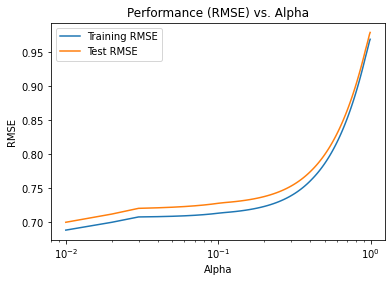

In [33]:
# Add code here
# RMSE vs. alpha
import matplotlib.pyplot as plt

# Part (a): Performance (RMSE) vs. alpha

# Set up figure and axes
fig, ax = plt.subplots()

# Plot RMSE on training data
ax.plot(Coefficients['alpha'], Coefficients['RMSE_train'], label='Training RMSE')

# Plot RMSE on test data
ax.plot(Coefficients['alpha'], Coefficients['RMSE_test'], label='Test RMSE')

# Set plot labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
ax.set_title('Performance (RMSE) vs. Alpha')

# Set x-axis scale to log
ax.set_xscale('log')

# Show legend
ax.legend()

# Show the plot
plt.show()



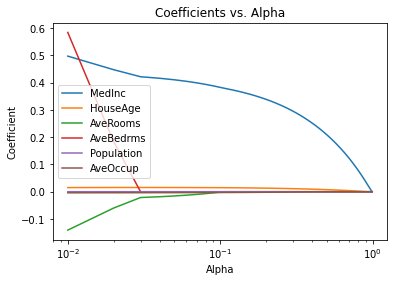

In [34]:
# Add code here
# Coefficient vs. alpha
# Part (b): Coefficients vs. alpha

# Set up figure and axes
fig, ax = plt.subplots()

# Plot coefficients
for feature in X.columns:
    ax.plot(Coefficients['alpha'], Coefficients[feature], label=feature)

# Set plot labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficient')
ax.set_title('Coefficients vs. Alpha')

# Set x-axis scale to log
ax.set_xscale('log')

# Show legend
ax.legend()

# Show the plot
plt.show()


7. Compare `Ridge` and `Lasso` baseline models.  Show that `Ridge` and `Lasso` return the same trained model when `alpha = 0.00001` (i.e. close to zero). <br/><span style="color:red" float:right>[1 point]</span>

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Train a Ridge model with alpha = 0.00001
ridge = Ridge(alpha=0.00001)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Train a Lasso model with alpha = 0.00001
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Check if the Ridge and Lasso models return the same trained model
if np.allclose(ridge.coef_, lasso.coef_, atol=1e-1):
    print("Ridge and Lasso return the same trained model when alpha is close to zero.")
else:
    print("Ridge and Lasso do not return the same trained model.")

# Compare RMSE values
print("Ridge RMSE:", ridge_rmse)
print("Lasso RMSE:", lasso_rmse)


Ridge and Lasso return the same trained model when alpha is close to zero.
Ridge RMSE: 0.6958150975810451
Lasso RMSE: 0.6958151855444665


8. Get regression coefficients and performance metrics for varying `alpha` on a ridge regression.  The performance metrics are  RMSE for training and test data.  In other words, repeat the above using `Ridge` instead of `Lasso`.   For `ridge`, we will use the following range for `alpha`: `np.power(2., np.arange(1., 25., 1.))`

> Note: Ridge has a  different behaviour than Lasso. Coefficients will very gradually approach zero and not have a steep drop off. You probably will not notice any zero coefficients.

<br/><span style="color:red" float:right>[1 point]</span>

In [36]:
# Add code here
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
alpha_vals = np.power(2., np.arange(1., 25., 1.))

# Create a DataFrame to store coefficients and performance metrics
Coefficients_ridge = pd.DataFrame(data=alpha_vals, columns=['alpha'])
Coefficients_ridge[list(X.columns) + ['RMSE_train', 'RMSE_test']] = np.nan

# Loop over the alpha values
for i, alpha in enumerate(Coefficients_ridge['alpha']):
    # Instantiate a Ridge regression with alpha
    ridge = Ridge(alpha=alpha)

    # Fit the Ridge regression
    ridge.fit(X_train, y_train)

    # Add the coefficients to the DataFrame row
    Coefficients_ridge.loc[i, list(X.columns)] = ridge.coef_

    # Predict training labels
    y_hat_train = ridge.predict(X_train)

    # Determine training error metric (RMSE)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))

    # Add the training error metric (RMSE) to the DataFrame row
    Coefficients_ridge.loc[i, 'RMSE_train'] = rmse_train

    # Predict test labels
    y_hat_test = ridge.predict(X_test)

    # Determine test error metric (RMSE)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

    # Add the test error metric (RMSE) to the DataFrame row
    Coefficients_ridge.loc[i, 'RMSE_test'] = rmse_test

# Print the Coefficients_ridge DataFrame with coefficients and performance metrics
print(Coefficients_ridge)


         alpha    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0          2.0  0.546259  0.014829 -0.220953   0.980564    0.000025 -0.004196   
1          4.0  0.545761  0.014832 -0.220122   0.976364    0.000025 -0.004194   
2          8.0  0.544777  0.014840 -0.218481   0.968065    0.000025 -0.004191   
3         16.0  0.542855  0.014854 -0.215276   0.951863    0.000026 -0.004186   
4         32.0  0.539177  0.014882 -0.209161   0.920958    0.000026 -0.004175   
5         64.0  0.532429  0.014932 -0.197989   0.864536    0.000027 -0.004155   
6        128.0  0.520917  0.015014 -0.179110   0.769321    0.000027 -0.004121   
7        256.0  0.503440  0.015128 -0.151035   0.628149    0.000029 -0.004068   
8        512.0  0.480741  0.015247 -0.116252   0.454492    0.000031 -0.003998   
9       1024.0  0.455377  0.015309 -0.081498   0.284138    0.000032 -0.003915   
10      2048.0  0.428504  0.015232 -0.052894   0.150870    0.000034 -0.003820   
11      4096.0  0.397006  0.

9. Ridge changes with alpha
<br/>
(a) Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha` for `Ridge`. In other words, repeat the above using `Ridge` instead of `Lasso`.  
<br/>
(b) Using a visual, show how the model's coefficients for ridge changed as we gradually increased the shrinkage parameter `alpha`.  
<br/><span style="color:red" float:right>[2 point]</span>

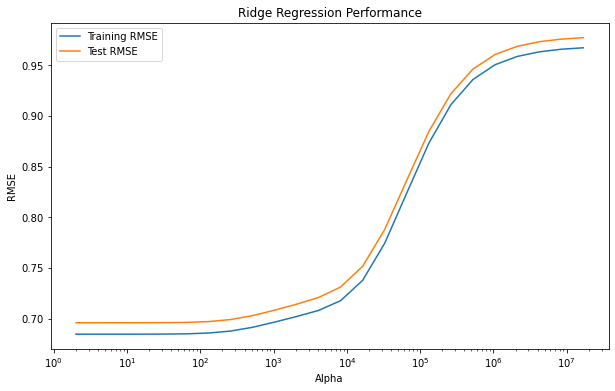

In [37]:
# Add code here
# RMSE vs. alpha
import matplotlib.pyplot as plt

# Plot performance (RMSE) on training and test data
plt.figure(figsize=(10, 6))
plt.plot(Coefficients_ridge['alpha'], Coefficients_ridge['RMSE_train'], label='Training RMSE')
plt.plot(Coefficients_ridge['alpha'], Coefficients_ridge['RMSE_test'], label='Test RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Ridge Regression Performance')
plt.xscale('log')
plt.legend()
plt.show()


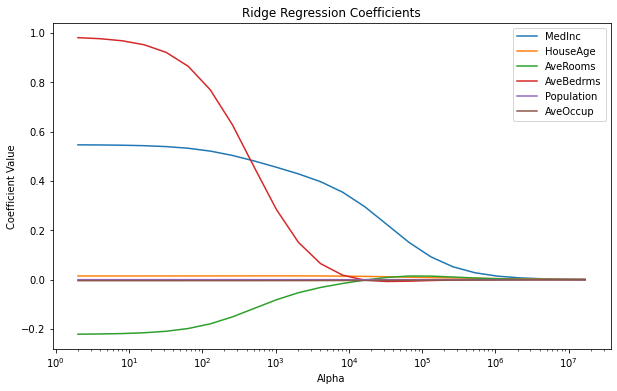

In [38]:
# Add code here
# Coefficient vs. alpha

# Plot model coefficients for Ridge regression
plt.figure(figsize=(10, 6))
for feature in X.columns:
    plt.plot(Coefficients_ridge['alpha'], Coefficients_ridge[feature], label=feature)
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.xscale('log')
plt.legend()
plt.show()



10. Based on the results, briefly describe the effect of changing `alpha` on the coefficients of both `Ridge` and `Lasso`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number. <br/><span style="color:red" float:right>[2 point]</span>

#### Comments on regularization using ridge and lasso
For Ridge as alpha increases the coefficients gets smaller, I would choose one which seems to get the best amount of information. 
For Lasso as alpha increases coefficients get closer to one. I would choose .01. 


# End of assignment